# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gdown
#%matplotlib inline

In [80]:
file_id = '1MDXuZQK7bWuFWyZkS8KH0IqFcDpkh34A'
url = (f'https://drive.google.com/uc?id={file_id}')

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [81]:
sinasc_raw = pd.read_csv(url)
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [82]:
sinasc_raw.DTNASC

,DTNASC
0,2019-02-19
1,2019-02-21
2,2019-02-25
3,2019-03-20
4,2019-03-23
...,...
27023,2019-12-13
27024,2019-10-04
27025,2019-08-02
27026,2019-12-23


In [83]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [84]:
sinasc_raw.isna().sum()

,0
ORIGEM,0
CODESTAB,115
CODMUNNASC,0
LOCNASC,0
IDADEMAE,0
...,...
munResUf,0
munResLat,1
munResLon,1
munResAlt,1


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [85]:
sinasc_raw.groupby('munResNome')[['IDADEMAE', 'IDADEPAI']].mean().unstack()

munResNome             
IDADEMAE  Alta Floresta D'Oeste      25.991826
          Alto Alegre dos Parecis    24.844156
          Alto Paraíso               24.960177
          Alvorada D'Oeste           25.770732
          Ariquemes                  25.607866
                                       ...    
IDADEPAI  Theobroma                  30.083333
          Urupá                      31.008929
          Vale do Anari              34.000000
          Vale do Paraíso            29.976744
          Vilhena                    34.152941
Length: 106, dtype: float64

### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [86]:
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])

aniversario = sinasc_raw[(sinasc_raw['DTNASC'].dt.day == 13) & (sinasc_raw['DTNASC'].dt.month == 10)]
pesoBB = aniversario.groupby('ESCMAE')['PESO'].mean()
pesoBB

,PESO
ESCMAE,
1 a 3 anos,3090.000000
12 anos ou mais,3242.727273
4 a 7 anos,3049.285714
8 a 11 anos,3207.333333


### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [87]:
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])
ano_nascido = sinasc_raw[sinasc_raw['DTNASC'].dt.year == 2019]

bb_mun = ano_nascido.groupby('munResNome')[['IDADEMAE', 'IDADEPAI']].mean().unstack()
bb_mun

munResNome             
IDADEMAE  Alta Floresta D'Oeste      25.991826
          Alto Alegre dos Parecis    24.844156
          Alto Paraíso               24.960177
          Alvorada D'Oeste           25.770732
          Ariquemes                  25.607866
                                       ...    
IDADEPAI  Theobroma                  30.083333
          Urupá                      31.008929
          Vale do Anari              34.000000
          Vale do Paraíso            29.976744
          Vilhena                    34.152941
Length: 106, dtype: float64

In [88]:
bb_mun = ano_nascido.groupby('munResNome')[['IDADEMAE', 'IDADEPAI']].min().unstack()
bb_mun

munResNome             
IDADEMAE  Alta Floresta D'Oeste      14.0
          Alto Alegre dos Parecis    14.0
          Alto Paraíso               11.0
          Alvorada D'Oeste           15.0
          Ariquemes                  13.0
                                     ... 
IDADEPAI  Theobroma                  23.0
          Urupá                      17.0
          Vale do Anari              23.0
          Vale do Paraíso            18.0
          Vilhena                    18.0
Length: 106, dtype: float64

In [89]:
bb_mun = ano_nascido.groupby('munResNome')[['IDADEMAE', 'IDADEPAI']].max().unstack()
bb_mun

munResNome             
IDADEMAE  Alta Floresta D'Oeste      53.0
          Alto Alegre dos Parecis    41.0
          Alto Paraíso               42.0
          Alvorada D'Oeste           44.0
          Ariquemes                  44.0
                                     ... 
IDADEPAI  Theobroma                  45.0
          Urupá                      48.0
          Vale do Anari              58.0
          Vale do Paraíso            51.0
          Vilhena                    60.0
Length: 106, dtype: float64

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [90]:
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])

In [91]:
mes = sinasc_raw[(sinasc_raw['DTNASC'].dt.month == 3)]
nascidos_vivo = mes.groupby('munResNome')['IDADEMAE'].mean()
nascidos_vivo

,IDADEMAE
munResNome,
Alta Floresta D'Oeste,26.193548
Alto Alegre dos Parecis,25.100000
Alto Paraíso,24.818182
Alvorada D'Oeste,25.772727
Ariquemes,25.304965
Buritis,25.406780
Cabixi,28.000000
Cacaulândia,26.200000
Cacoal,26.466165


In [92]:
nascidos_vivo = mes.groupby('munResNome')['IDADEMAE'].max()
nascidos_vivo

,IDADEMAE
munResNome,
Alta Floresta D'Oeste,35
Alto Alegre dos Parecis,36
Alto Paraíso,41
Alvorada D'Oeste,36
Ariquemes,42
Buritis,42
Cabixi,36
Cacaulândia,32
Cacoal,40


In [93]:
nascidos_vivo = mes.groupby('munResNome')['IDADEMAE'].min()
nascidos_vivo

,IDADEMAE
munResNome,
Alta Floresta D'Oeste,18
Alto Alegre dos Parecis,17
Alto Paraíso,11
Alvorada D'Oeste,15
Ariquemes,14
Buritis,15
Cabixi,17
Cacaulândia,18
Cacoal,15


In [94]:
idade_pais = mes.groupby('munResNome')[['IDADEMAE','IDADEPAI']].mean().unstack()
idade_pais

munResNome             
IDADEMAE  Alta Floresta D'Oeste      26.193548
          Alto Alegre dos Parecis    25.100000
          Alto Paraíso               24.818182
          Alvorada D'Oeste           25.772727
          Ariquemes                  25.304965
                                       ...    
IDADEPAI  Theobroma                  28.500000
          Urupá                      30.230769
          Vale do Anari              32.000000
          Vale do Paraíso            30.000000
          Vilhena                    33.562500
Length: 104, dtype: float64

In [95]:
idade_pais = mes.groupby('munResNome')[['IDADEMAE','IDADEPAI']].min().unstack()
idade_pais

munResNome             
IDADEMAE  Alta Floresta D'Oeste      18.0
          Alto Alegre dos Parecis    17.0
          Alto Paraíso               11.0
          Alvorada D'Oeste           15.0
          Ariquemes                  14.0
                                     ... 
IDADEPAI  Theobroma                  26.0
          Urupá                      22.0
          Vale do Anari              30.0
          Vale do Paraíso            19.0
          Vilhena                    27.0
Length: 104, dtype: float64

In [96]:
idade_pais = mes.groupby('munResNome')[['IDADEMAE','IDADEPAI']].max().unstack()
idade_pais

munResNome             
IDADEMAE  Alta Floresta D'Oeste      35.0
          Alto Alegre dos Parecis    36.0
          Alto Paraíso               41.0
          Alvorada D'Oeste           36.0
          Ariquemes                  42.0
                                     ... 
IDADEPAI  Theobroma                  31.0
          Urupá                      47.0
          Vale do Anari              34.0
          Vale do Paraíso            46.0
          Vilhena                    47.0
Length: 104, dtype: float64

In [97]:
sinasc_raw.dtypes

,0
ORIGEM,int64
CODESTAB,float64
CODMUNNASC,int64
LOCNASC,int64
IDADEMAE,int64
...,...
munResUf,object
munResLat,float64
munResLon,float64
munResAlt,float64


In [98]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [99]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

<bound method Axes.bar of <Axes: xlabel='IDADEMAE'>>

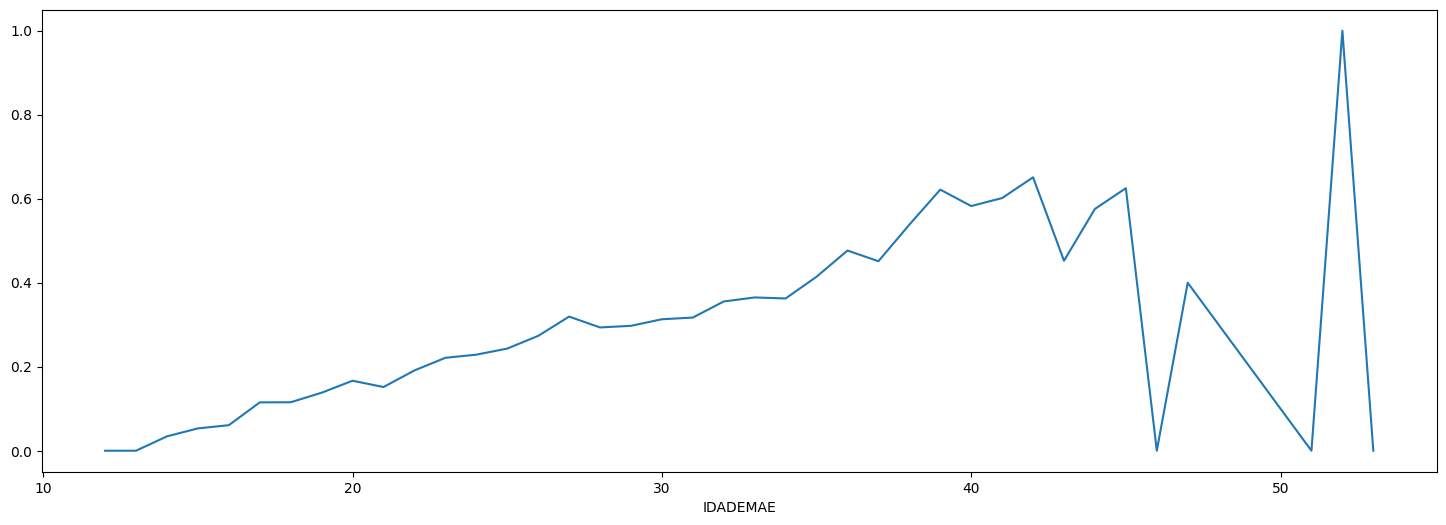

In [100]:
sinasc_raw.groupby('IDADEMAE')['QTDFILMORT'].mean().plot(figsize=(18,6)).bar

<bound method Axes.bar of <Axes: xlabel='IDADEMAE'>>

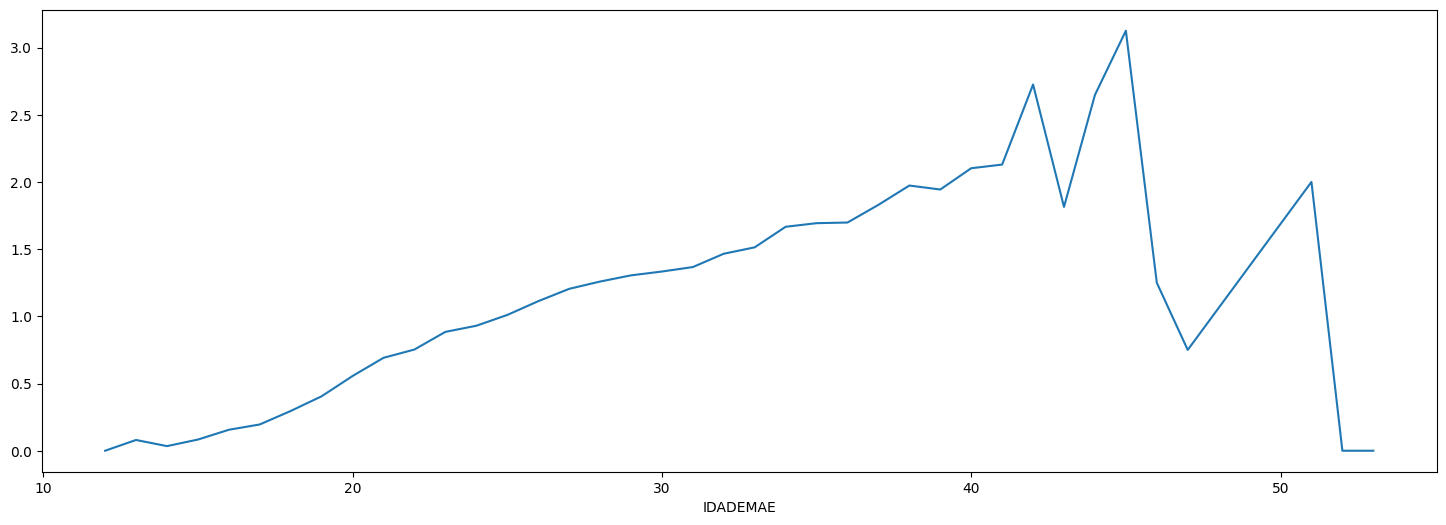

In [101]:
sinasc_raw.groupby('IDADEMAE')['QTDFILVIVO'].mean().plot(figsize=(18,6)).bar

OLHANDO OS GRAFICOS, TEM UMA PEQUENA RELAÇÃO DE IDADES DAS MÃES EM RELAÇÃO AO NACIMENTO DO BB, ESSAS IDADE FICAM ABAIXO DE 15(MAIS OU MENOS)  E A ACIMA DE 50 ANOS. EM QUESTAO DA SAUDE E ESTRUTURA DO CORPO.